In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
%matplotlib inline

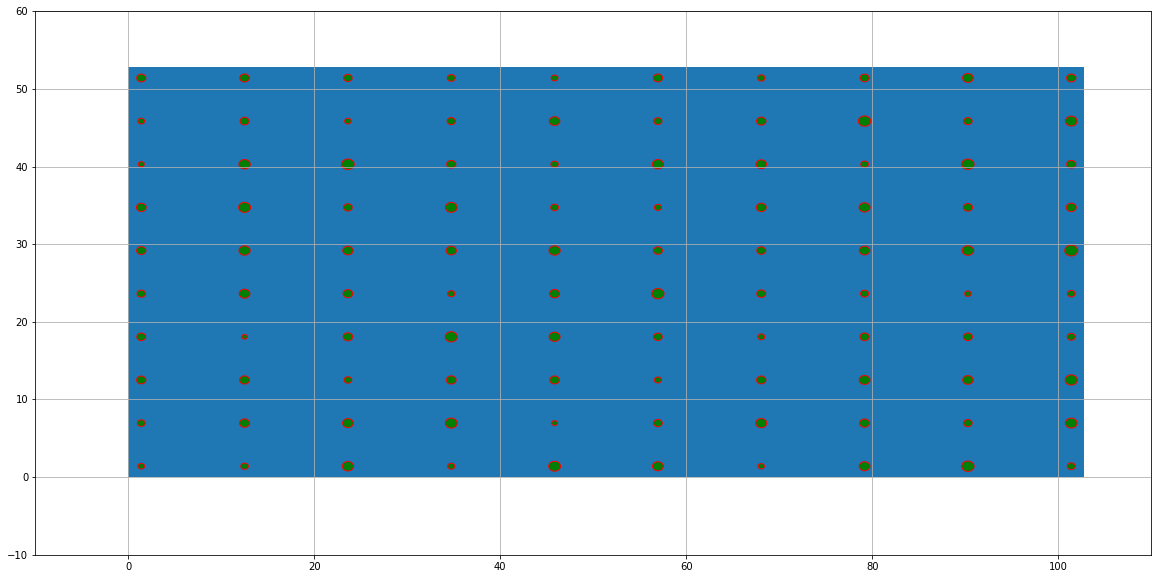

In [16]:
nx,ny = (10,10)
lx, ly=(100,50)
x, y = (np.linspace(0,lx, nx), np.linspace(0,ly, ny))
xx,yy = np.meshgrid(x,y)
rr = np.random.normal(0.5,0.1,(nx,ny))
rr_max = np.max(rr)
offset = rr_max
margin =2.0
plt.figure(figsize=(20, 10))
fig = plt.gcf()
frame = plt.Rectangle(height=50+(offset*2*margin),width=100+(offset*2*margin),xy=(0,0))
fig.gca().add_artist(frame)

xx = xx + (offset*margin)
yy = yy + (offset*margin)

for j in range(xx.shape[0]):
    for i in range(xx[j].shape[0]):
        circle1 = plt.Circle((xx[j][i], yy[j][i]), rr[i][j] , color='r')
        circle1.set_facecolor('g')
        fig.gca().add_artist(circle1)
plt.xlim(-10, 110)
plt.ylim(-10, 60)
plt.grid(1)
# plt.savefig('test.svg')

In [17]:
import ezdxf

In [26]:
dwg = ezdxf.new('AC1015')
dwg.layers.new(name = 'frame')
dwg.layers.new(name = 'media')

In [27]:
msp = dwg.modelspace()
width=100+(2*offset*margin)
height=50+(2*offset*margin)
xy=(0,0)
points = [xy, (width, xy[0]), (width, height), (xy[0], height), xy]
msp.add_lwpolyline(points,dxfattribs={'layer': 'frame'})
for j in range(xx.shape[0]):
    for i in range(xx[j].shape[0]):
        msp.add_circle((xx[j][i],yy[j][i]),0.5,dxfattribs={'layer':'media'})
dwg.saveas("./iso_v1.dxf")